# TP2 : Étude de pendules.

## Exercice 1.- Pendule simple sans frottements.

Une masse ponctuelle $m$ est accrochée au bout d'une tige rigide de longueur $l$ (et de masse considérée nulle). On place l'origine du repère au point d'attache de la tige et on note $\theta$ l'angle orienté entre l'axe vertical et la tige. On rappelle que le mouvement du pendule est décrit par l'équation différentielle
$$ \tag{E}
\theta''(t) + \frac{g}{l} \sin ( \theta(t) ) = 0 \: ,
$$
où $g = 9.80665$ est l'accélération de la pesanteur à la surface de la Terre. On prendra $l = 0.3$ ($30$ cm). On pose $\omega_0 = \sqrt{\frac{g}{l}}$.

![](simplePenduleFig.png)

1. En posant $v = \theta^\prime$, mettre l'équation différentielle $(E)$ sous la forme d'un système différentiel $(E_1)$ d'ordre $1$ portant sur $\displaystyle \left( \begin{array}{c}
\theta \\ 
v
\end{array} \right)$.

*On a $\displaystyle v^\prime = \theta^{\prime\prime} = -\frac{g}{l} \sin ( \theta )$ et on peut réécrire $(E)$ sous la forme du système d'ordre $1$ :
$$
\left( \begin{array}{c}
\theta^\prime \\ 
v^\prime
\end{array} \right) = \left( \begin{array}{c}
v \\ 
\frac{g}{l} \sin ( \theta )
\end{array} \right) \: .
$$*

2. Modifier la fonction `pointMilieu1D` implémentée dans le précédent TP en une fonction `pointMilieuMultiD` afin de traiter le cas multidimensionnel $y \in \mathbb{R}^d$, $d \in \mathbb{N}^\ast$. La fonction `pointMilieuMultiD` aura les mêmes arguments et la même structure que dans le cas $1D$, sauf que `y0` sera maintant un `numpy array`. On retrouvera ainsi la dimension $d$ par `d = y0.size`. La fonction renverra une liste `[tps, sol]` où `tps` est toujours le vecteur $[t_0, \ldots, t_N]$ et `sol` est un `numpy ndarray` de taille `(tps.size, y0.size)`. 

*En faisant attention, il suffit de modifier légèrement deux lignes : on peut récupérer la dimension $d$ grâce à la taille de la condion initiale `y0.size` et `sol` est à présent un `np.ndarray` (matrice), la $i^{\text{ème}}$ ligne `sol[i]` correspond au vecteur $y_i \in \mathbb{R}^d$ approximation de $y(t_i)$.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pointMilieuMultiD(fun, t0, T, y0, h):

    """ fun est le second membre de l'equation y' = fun(t,y)
        [t0,t0+T] est l'intervalle de temps sur lequel on resout
        y0 est un numpy array : c'est la condition initiale y(t0)=y0
        h est le pas de temps"""
    """euler renvoie
        * tps un numpy array contenant la discretisation de l'intervalle de temps
        * sol un numpy ndarray de taille (tps.size, y0.size) """
        
    tps = np.arange(t0, t0+T+h, h)
    d = y0.size # 
    N = tps.size
    sol = np.zeros((N, d)) #
    sol[0]=y0
    for i in range(N-1):
        p1 = fun(tps[i],sol[i])
        sol[i+1] = sol[i] + h*fun(tps[i]+0.5*h, sol[i]+0.5*h*p1)
    
    return [tps, sol]

3. Résoudre numériquement $(E)$ en utilisant le schéma du Point Milieu sur l'intervalle $[0, T]$, avec `T = 10` et un pas de temps `h = 0.001` et en prenant comme condition initiale $\theta(0) = \pi/4$ et $v(0) = \theta'(0) = 0$. Représenter $\theta$ et $v = \theta^\prime$ en fonction du temps sur une première fenêtre graphique. Recommencer pour différentes valeurs de $\theta(0)$ et $v(0)$.

*Lorsque vous définissez `secondMembre(t,y)`, faites attention : `y` est un `numpy.array([theta, v])` de taille $2$ et `secondMembre` renvoie un `numpy array` de taille $2$.*

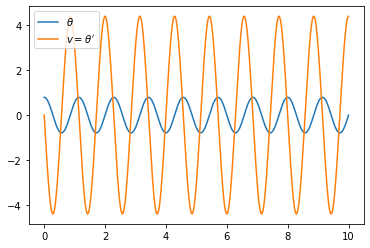

In [3]:
# parametres

g = 9.80665
l = 0.3
a = g/l
t0 = 0.
T = 10.
h = 0.001

# second membre du systeme

def pendule(t, y):
    theta = y[0]
    v = y[1]
    return np.array([v, -a*np.sin(theta)])

# solution avec CI theta0 = pi/4, v0 = 0.
    
y0 = np.array([np.pi/4, 0.])
tps1, sol1 = pointMilieuMultiD(pendule, t0, T, y0, h) 

plt.plot(tps1, sol1[:,0], label = r'$\theta $')
plt.plot(tps1, sol1[:,1], label = r'$v = \theta^\prime$')
plt.legend(loc= 'best')

4. On veut à présent représenter la solution approchée dans le plan $(\theta, v)$ (aussi appelé plan de phase...). Dans une nouvelle fenêtre graphique, tracer la courbe $(\theta(t), v(t))$, $t \in [0,T]$  ou plus exactement, $t \in $ `tps` (pour $\theta(0) = \pi/4$ et $v(0) = \theta'(0) = 0$ par exemple). Ajouter sur la même figure les courbes correspondant aux conditions initiales $\theta(0) \in \{ 0, 2\pi \}$ et $v(0) \in \left\lbrace \sqrt{\frac{2g}{l}}, \sqrt{\frac{4g}{l}}, \sqrt{\frac{6g}{l}} \right\rbrace$.

*C'est assez simple : si on veut représenter une courbe paramétrée $(x(t), y(t))$ sur un intervalle $t \in [0,T]$ et qu'on connaît $x$ et $y$ sur un vecteur de temps `tps` qui discrétise régulièrement $[0,T]$, il suffit de tracer `y[tps]` en fonction de `x[tps]`.*

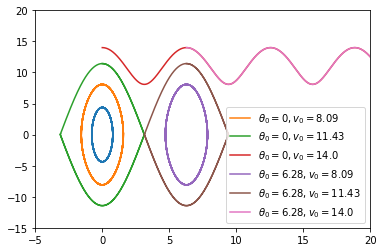

In [4]:
# portrait de phase

plt.plot(sol1[:,0], sol1[:,1])

for theta0 in [0, 2*np.pi]:
    for v0 in [np.sqrt(2*a),np.sqrt(4*a),np.sqrt(6*a)]:
        y0 = np.array([theta0,v0])
        tps, sol = pointMilieuMultiD(pendule, t0, T, y0, h)
        plt.plot(sol[:,0], sol[:,1], label = r'$\theta_0 = $'+str(round(theta0,2))+r'$, v_0 = $'+str(round(v0,2)))
plt.axis([-5, 20, -15, 20])
plt.legend(loc = 'lower right')
#plt.savefig('portraitPenduleSimple.png')

5. On introduit l'énergie mécanique du pendule $E_m$ qui doit être constante en l'absence de frottements, comme vous l'avez peut-être vu en mécanique un jour ...
$$
E_m = \underbrace{\frac{1}{2} m (l \theta^\prime)^2}_{\text{énergie cinétique}}  \underbrace{- mg l \cos \theta}_{\text{énergie potentielle}} = m l^2 E(\theta,v) \: .
$$
Sur une même figure, représenter l'énergie mécanique du système en fonction du temps pour chacune des solutions calculées à la question précédente. 

*Pour chaque solution $(\theta, v)$, on demande de représenter $t \in$ `tps` $\mapsto E(\theta(t), v(t))$.* 

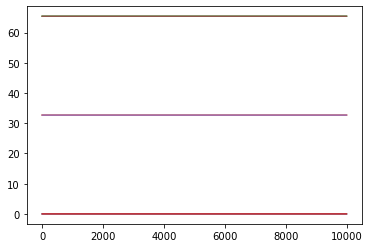

In [5]:
# énergie mécanique
 
def energie(theta, v):
    return 0.5*v**2 - a*np.cos(theta) 

for theta0 in [0, 2*np.pi]:
    for v0 in [np.sqrt(2*a),np.sqrt(4*a),np.sqrt(6*a)]:
        y0 = np.array([theta0,v0])
        tps, sol = pointMilieuMultiD(pendule, t0, T, y0, h)
        plt.plot(energie(sol[:,0], sol[:,1]))


6. Vérifier que $\displaystyle E(\theta,v) = \frac{1}{2} v^2 - \frac{g}{l} \cos \theta$ est constante le long des solutions $(\theta(t), v(t))_{t \in [0,T]}$ (par un calcul théorique cette fois).

*On change le nom des variables pour éviter les confusions : $\displaystyle E(x_1, x_2) = \frac{1}{2} (x_2)^2 - \frac{g}{l} \cos x_1$, ainsi $\displaystyle \partial_1 E(x_1, x_2) = \frac{g}{l} \sin x_1$ et $\displaystyle \partial_2 E (x_1, x_2) = x_2$. On en déduit 
$$
\dfrac{d}{dt} E (\theta(t),v(t)) = \theta^\prime(t) \partial_1 E (\theta(t), v(t)) + v^\prime(t) \partial_2 E (\theta(t),v(t)) =  \theta^\prime(t) \frac{g}{l} \sin \theta(t) + \theta^{\prime\prime}(t) \theta^\prime(t) = 0 \: .
$$*

7. On appellera *orbite* $\mathcal{O}_{(\theta_0, v_0)}$ passant par $(\theta_0, v_0)$  l'image de la solution maximale $(\theta, v)$ définie sur un intervalle $J$ et telle que $(\theta(0), v(0)) = (\theta_0, v_0)$, c'est-à-dire
$$
\mathcal{O}_{(\theta_0, v_0)} = \{ (\theta(t), v(t)) \in \mathbb{R}^2 \: : \: t \in J \} \: .
$$
Utiliser la question précédente pour montrer qu'une orbite de $(E_1)$ est toujours incluse dans une ligne de niveau de $E$ i.e. dans un ensemble de la forme
$$
\mathcal{E}_c := \{ (x_1,x_2) \in \mathbb{R}^2 \: : \: E(x_1,x_2) = c \} \quad \text{pour } c \in \mathbb{R} \: .
$$
Relier $c$ et $(\theta_0, v_0)$.

*Soit $(x_1, x_2) \in \mathcal{O}_{(\theta_0, v_0)}$, il existe $t \in J$ tel que $x_1 = \theta(t)$ et $x_2 = v(t)$. Comme l'énergie macanique est constante le long des solutions, on a
$$
E (x_1, x_2) = E(\theta(t),v(t)) = E(\theta(0), v(0)) = E(\theta_0, v_0) \: .
$$
Ainsi $\mathcal{O}_{(\theta_0, v_0)} \subset \mathcal{E}_c$ avec $c = E(\theta_0, v_0)$.*


8. Représenter sur une première figure quelques lignes de niveaux de $E$ grâce à la fonction `plt.contour`. Afin de comparer au portrait de phase obtenu à la question $4$, sur une nouvelle figure, représenter les lignes de niveaux correspondant aux orbites représentées à la question $4$ : pour cela, aidez-vous de la relation établie entre $c$ et $(\theta_0, v_0)$ à la question précédente.

*Lisez attentivement la section **Aide** à la fin du notebook concernant `plt.contour` et `np.meshgrid` ou utilisez l'aide en ligne de `matplotlib`.*

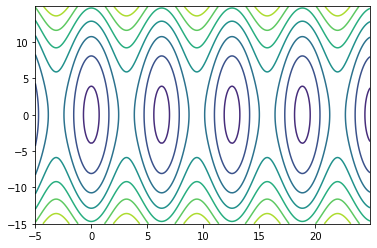

In [6]:
# Lignes de niveau de l'énergie
gtheta, gv = np.meshgrid(np.arange(-5, 25, 0.1), np.arange(-15, 15, 0.1))
energ_thv = energie(gtheta, gv)
plt.contour(gtheta, gv, energ_thv)  

*On rappelle que `a = g/l`, ainsi, pour $\theta_0 \in \{ 0, 2 \pi \}$, $\cos \theta_0 =1$ et en notant $c = E(\theta_0, v_0) = \frac{1}{2} v_0^2 - a$ on obtient :*
- *si $v_0 = \sqrt{2a}$ : $c = a- a = 0$,*

- *si $v_0 = \sqrt{4a}$ : $ c = 2a - a = a$,*

- *si $v_0 = \sqrt{6a}$ : $c = 3a - a = 2a$.*

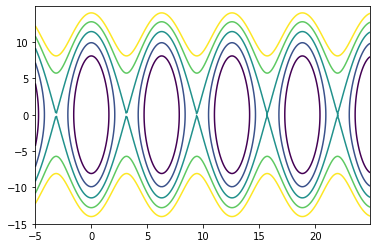

In [7]:
# On choisit des niveaux d'énergie correspondant au portrait de phase de la question 4
plt.contour(gtheta, gv, energ_thv, [0, 0.5*a, a, 1.5*a, 2*a]) 



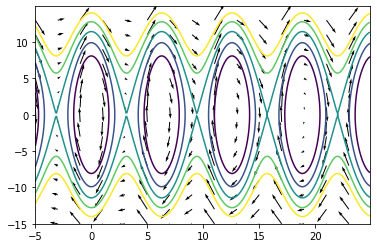

In [8]:
# On ajoute le champ de vecteur
plt.contour(gtheta, gv, energ_thv, [0, 0.5*a, a, 1.5*a, 2*a]) 

gtheta, gv = np.meshgrid(np.arange(-5, 25, 2), np.arange(-15, 15, 2))
vtheta, vv = pendule(0, [gtheta, gv])
plt.quiver(gtheta, gv, vtheta, vv, angles="xy", width=0.003)

**Bonus.** *Pour chacun des $3$ niveaux d'énergie, on représente le mouvement du pendule.*

MovieWriter stderr:
/tmp/tmp1902umpj/temp.m4v: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp1902umpj/temp.m4v']' returned non-zero exit status 1.

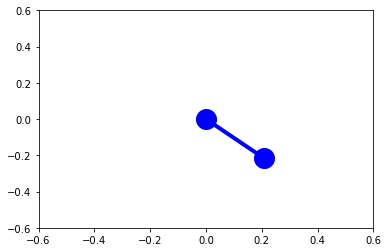

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML


def coord(theta):
    return l*np.sin(theta), -l*np.cos(theta)


def init():
    line.set_data([], [])
    return line,

    
def updatefig(i):
    ax.clear
    line.set_data([0, x[i]], [0, y[i]])
    return line ,

v0 = np.sqrt(2*a) # np.sqrt(4*a),np.sqrt(6*a)
y0 = np.array([0,v0])
tps, sol = pointMilieuMultiD(pendule, t0, 10, y0, 0.01)
theta = sol[:,0]
x, y = coord(theta[::10]) #on prend un élément sur 10, moins long.
    
fig = plt.figure()  
ax = plt.axes(xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))
line, = ax.plot([], [], 'b-o', lw=4, ms = 20)

anim = animation.FuncAnimation(fig, updatefig, x.size, init_func = init, blit = True)
HTML(anim.to_html5_video())

#anim.save("test.mp4", fps=10)

In [1]:
%%HTML
<div align="middle">
<video width="30%" controls>
      <source src="pendulesimple2a.mp4" type="video/mp4">
</video>
<video width="30%" controls>
      <source src="pendulesimple4a.mp4" type="video/mp4">
</video>
<video width="30%" controls>
      <source src="pendulesimple6a.mp4" type="video/mp4">
</video>
</div>

| - | - | - |
|---|---|---|
| ![](orbite2a.png) | ![](orbite4a.png) | ![](orbite6a.png) |


## Exercice 2.- Un pendule double

Le pendule double étudié ici consiste en un pendule (c'est-à-dire une tige de masse nulle et de longueur $l_1$ à laquelle est accrochée une masse $m_1$) à l'extrémité duquel on accroche un autre pendule (tige de longueur $l_2$ à laquelle est accrochée une masse $m_2$). On note $\theta_1$ l'angle que la première tige fait avec l'axe vertical, et $\theta_2$ l'angle que fait la deuxième tige avec l'axe vertical. On placera par la suite l'origine du repère au point d'attache de la première tige.

![](doublePenduleFig.png)

On admettra que le mouvement du pendule est régi par le système d'équations différentielles $(E_2)$ :

$$
\begin{align*}
\theta_1^{''} & = \frac{( - m_2)l_1 \sin( \theta_1 - \theta_2) \cos (\theta_1 - \theta_2) (\theta_1^\prime )^2 - m_2 l_2 \sin (\theta_1 - \theta_2) (\theta_2^\prime )^2 - m_1 g \sin \theta_1 - m_2 g \sin (\theta_1 - \theta_2) \cos (\theta_2)}{l_1 \left(m_1 + m_2 \sin^2 (\theta_1 - \theta_2)\right)} \\
\theta_2^{''} & = \frac{(m_1 + m_2)l_1 \sin( \theta_1 - \theta_2) (\theta_1^\prime )^2 + m_2 l_2 \sin (\theta_1 - \theta_2) \cos (\theta_1 - \theta_2) (\theta_2^\prime )^2 + (m_1 + m_2) g \sin (\theta_1-\theta_2) \cos (\theta_1) }{l_2 \left(m_1 + m_2 \sin^2 (\theta_1 - \theta_2)\right)}
\end{align*}
$$

1. En posant $v_1 = \theta_1^\prime$ et $v_2 = \theta_2^\prime$, ramener le système $(E_2)$ à un système différentiel $(E_4)$ non linéaire d'ordre $1$ à $4$ équations.


2. On fixe les valeurs des paramètres à `l1=1`; `m1=2`; `l2=1`; `m2=1`; `g=9.80665`, définir une fonction `penduleDouble` qui prend en argument une vecteur de taille $4$ et renvoie un vecteur de taille $4$ définissant le second membre de $(E_4)$.

In [ ]:
# parametres
g = 9.80665
l1 = 1.
l2 = 1.
m1 = 2.
m2 =1.
    
# second membre du systeme

def penduleDouble(t,y):
    #y=[theta1,theta2,v1,v2]
    #w=[theta1',theta2',v1',v2']
    y1 = y[0]; y2 = y[1]; y3 = y[2]; y4 = y[3]
    w = np.zeros(4)
    w[0] = y3
    w[1] = y4
    w[2] = ( (-m2)*l1*np.sin(y1-y2)*np.cos(y1-y2)*y3**2 - m2*l2*np.sin(y1-y2)*y4**2 - m1*g*np.sin(y1) - m2*g*np.sin(y1-y2)*np.cos(y2) )/(l1*(m1+m2*np.sin(y1-y2)**2 ))
    w[3] = ( (m1+m2)*l1*np.sin(y1-y2)*y3**2 + m2*l2*np.sin(y1-y2)*np.cos(y1-y2)*y4**2 + (m1+m2)*g*np.sin(y1-y2)*np.cos(y1) )/(l2*( m1+m2*np.sin(y1-y2)**2 ))
    return w    

3. Calculer les coordonnées $(x_1,y_1)$ et $(x_2,y_2)$ de la masse $m_1$ et de la masse $m_2$ dans le repère dont l'origine est le point d'attache du premier pendule. Écrire une fonction `coord1` qui prend en argument l'angle $\theta_1$ et renvoie les coordonnées $(x_1,y_1)$ et une fonction `coord2` qui prend en argument les angles $\theta_1$ et $\theta_2$ et renvoie les coordonnées $(x_2,y_2)$. Vérifier que vous obtenez bien les coordonnées attendues pour des valeurs de $(\theta_1,\theta_2)$ particulières ($\theta_1=\theta_2=0$ ou $\theta_1=0$ et $\theta_2=\pi/2$ par exemple).


In [ ]:
# coordonnées des masses

def coord1(theta1):
    return l1*np.sin(theta1), -l1*np.cos(theta1)

def coord2(theta1,theta2):
    x2 = l1*np.sin(theta1) + l2*np.sin(theta2) 
    y2 = -l1*np.cos(theta1) - l2*np.cos(theta2) 
    return x2, y2


4. On lâche le pendule tendu avec un angle de $60^\circ$ ($\theta_1 (0) = \theta_2(0) = 2\pi/3$) et sans vitesse initiale ($\theta_1^\prime(0)=\theta_2^\prime(0)=0$). Calculer une approximation de l'évolution de $\theta_1$ et $\theta_2$ en utilisant le schéma du Point Milieu, sur un intervalle de temps $[0,20]$ uniformément discrétisé avec un pas de temps $h=0.005$. Représenter les trajectoires $(x_i(t), y_i(t))_{t \in [0,T]}$, $i=1,2$ des masses $m_1$ et $m_2$ obtenues.

In [ ]:
t0 = 0.
T = 20.
h = 0.005

y0 = np.array([2*np.pi/3, 2*np.pi/3, 0., 0.])
tps, sol = pointMilieuMultiD(penduleDouble, t0, T, y0, h)

theta1 = sol[:, 0]
theta2 = sol[:, 1]
x1, y1 = coord1(theta1)
x2, y2 = coord2(theta1, theta2)

# trajectoires

plt.plot(x1, y1, label='m1')
plt.plot(x2, y2, label='m2')
plt.legend(loc='best')

5. *Pour ceux qui ont le temps.* Réaliser une animation montrant le mouvement de l'ensemble du pendule.

In [ ]:
fig = plt.figure()  
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], 'b-o', lw=4, ms = 20)

x1, y1 = coord1(theta1[::25])
x2, y2 = coord2(theta1[::25], theta2[::25])

def init():
    line.set_data([], [])
    return line,

    
def updatefig(i):
    ax.clear
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    return line ,


anim = animation.FuncAnimation(fig, updatefig, x1.size, init_func = init, blit = True)
HTML(anim.to_html5_video())


In [ ]:
%%HTML
<div align="middle">
<video width="50%" controls>
      <source src="penduledouble.mp4" type="video/mp4">
</video>

## Exercice 3.- Pendule amorti

Reprendre l'étude effectuée dans le premier exercice en ajoutant une force de frottement d'intensité proportionnelle (coefficient $k>0$) à la vitesse du pendule :
$$
\theta''(t) + k \theta^\prime(t) + \frac{g}{l} \sin ( \theta(t) ) = 0 \:.
$$

## Aide 

*Exemples d'utilisation des fonctions `np.meshgrid`, `plt.contour`.*

- `np.meshgrid` : la fonction `np.meshgrid`permet de créer une grille de la fenêtre dans laquelle on souhaite tracer les lignes de niveaux. Étant donnés un `np.array x` discrétisant les abscisses et un `np.array x` discrétisant les ordonnées, on va former tous les couples possibles $(x_i, y_j)_{i,j}$ et renvoyer la matrice `np.ndarray gx` des abscisses ainsi que la matrice `np.ndarray gy` des ordonnées. Testons sur un exemple :

In [ ]:
x = np.linspace(0,5,6)
y = np.linspace(-5,0,6)
gx,gy = np.meshgrid(x,y)

# Voyons ce que ça donne ...
print("x = "+str(x)+"   et   y = "+str(y)+"\n")
print("gx = "+str(gx)+"\n")
print("gy = "+str(gy))

*On représente ci-dessous les points d'abscisses `gx` et d'ordonnées `gy` :*

In [ ]:
plt.plot(gx,gy,'.r')

- `plt.contour` : voici un exemple d'utilisation de `plt.contour` pour représenter des niveaux de la fonction $(x,y) \mapsto x^2 + 2y^2$. On commence par discrétiser la fenêtre dans laquelle on veux tracer les lignes de niveaux à l'aide de meshgrid. Plus on souhaite une précision fine sur les contours, plus il faut choisir une précision fine dans la discrétisation de cette fenêtre : ici concrètement, il faut assez de points dans les vecteurs `x` et `y`. Ensuite on évalue la fonction `f` en tous les points de la grille `gx,gy`, cela donne une grille de valeurs `gz` et la fonction `plt.contour` détermine les lignes de niveaux à partir de ces valeurs. On peut choisir de représenter les niveaux $\{ f(x,y) = c_i \}$, $i = 1, \ldots , m$ en l'indiquant en argument optionnel.


In [ ]:
def f(x,y):
    return x**2 + 2*y**2

# Pas assez de points 10 par 10
x = np.linspace(-3,3,10)
y = np.linspace(-5,5,10)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.subplot(1,2,1)
plt.contour(gx, gy, gz)
plt.title("10 par 10 points")

# Plus de points 100 par 100
x = np.linspace(-3,3,100)
y = np.linspace(-5,5,100)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.subplot(1,2,2)
plt.contour(gx, gy, gz)
plt.title("100 par 100 points")


In [ ]:
# On choisit les niveaux 
c = [1, 2, 2*np.pi, 10]
x  = np.linspace(-3,3,100)
y = np.linspace(-5,5,100)
gx, gy = np.meshgrid(x, y)
gz = f(gx, gy)
plt.contour(gx, gy, gz, c)
plt.title('on choisit les niveaux $c_i$')

In [ ]:
# On ajoute des labels ...
fig, ax = plt.subplots()
CS = ax.contour(gx, gy, gz, c)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Avec des labels')